<a href="https://colab.research.google.com/github/smraytech/test/blob/main/Retail_Data_Analysis_%26_ML_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Title

Amazo Retail Data Analysis & ML Pipeline

Problem Statement

Modern e-commerce platforms like Amazon generate massive transaction data daily. Without a structured analytics and machine learning pipeline, businesses struggle to understand:

Customer behavior: Who are the repeat customers? Who spends the most?

Product performance: Which products or categories sell well? Which have high return rates?

Revenue patterns: How does revenue fluctuate by time (hour, day, month)?

Return likelihood: Which products or customer segments are more likely to return items?

Time-based trends: Seasonal, monthly, or weekly sales patterns for better planning

This project aims to build a complete Amazon-style retail analytics pipeline, combining data analysis, visualization, and optional predictive modeling, to help e-commerce businesses make data-driven decisions.

Project Objectives

Load and inspect the dataset – ensure data quality and completeness.

Clean and preprocess data – handle missing values, duplicates, invalid entries, and create useful features.

Perform Exploratory Data Analysis (EDA) – understand data distribution, correlations, and trends.

Extract revenue and sales insights – top categories, top customers, revenue drivers.

Analyze customer behavior – repeat vs one-time buyers, spending habits, rating patterns.

Understand returns and product quality – return rates, top returned products, rating vs returns.

Study time-series sales trends – daily, weekly, monthly, and hourly revenue patterns.

Build machine learning models – predict revenue per order or likelihood of return.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional ML imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style="whitegrid", rc={"figure.figsize": (10, 5)})

In [2]:
df = pd.read_csv('/content/amazon_retail_dataset.csv')

In [3]:
df.head()

,order_id,customer_id,product_category,price,quantity,rating,returned,purchase_time,revenue
0,1,25725,Home,124.41,4,2.8,0,2024-01-01 00:00:00,497.64
1,2,38030,Books,39.34,1,1.1,0,2024-01-01 01:00:00,39.34
2,3,27730,Clothing,289.22,2,4.9,0,2024-01-01 02:00:00,578.44
3,4,71404,Electronics,328.36,5,1.1,0,2024-01-01 03:00:00,1641.80
4,5,73206,Beauty,194.88,3,2.7,0,2024-01-01 04:00:00,584.64


In [17]:
df.shape

(5000, 9)

In [18]:
df.dtypes

,0
order_id,int64
customer_id,int64
product_category,object
price,float64
quantity,int64
rating,float64
returned,int64
purchase_time,datetime64[ns]
revenue,float64


In [19]:
print(df.isnull().sum())

order_id            0
customer_id         0
product_category    0
price               0
quantity            0
rating              0
returned            0
purchase_time       0
revenue             0
dtype: int64


In [20]:
# Convert purchase_time to datetime
# -----------------------------
df['purchase_time'] = pd.to_datetime(df['purchase_time'], errors='coerce')

print("✔ 'purchase_time' converted to datetime.\n")

✔ 'purchase_time' converted to datetime.



In [21]:
# Check for duplicates
# -----------------------------
duplicate_rows = df.duplicated().sum()
print(f"🔍 Duplicate rows found: {duplicate_rows}")

if duplicate_rows > 0:
    df = df.drop_duplicates()
    print("✔ Duplicates removed.\n")
else:
    print("✔ No duplicates detected.\n")

🔍 Duplicate rows found: 0
✔ No duplicates detected.



In [22]:
# Validate numerical values
# -----------------------------
invalid_price = df[df['price'] < 0].shape[0]
invalid_quantity = df[df['quantity'] <= 0].shape[0]
invalid_rating = df[(df['rating'] < 0) | (df['rating'] > 5)].shape[0]

In [23]:
print("🔍 Checking for invalid data:")
print(f"- Invalid price entries (<0): {invalid_price}")
print(f"- Invalid quantity entries (<=0): {invalid_quantity}")
print(f"- Invalid rating (<0 or >5): {invalid_rating}\n")

🔍 Checking for invalid data:
- Invalid price entries (<0): 0
- Invalid quantity entries (<=0): 0
- Invalid rating (<0 or >5): 0



In [24]:
# Clean invalid rows (if any)
df = df[df['price'] >= 0]
df = df[df['quantity'] > 0]
df = df[(df['rating'] >= 0) & (df['rating'] <= 5)]

print("✔ Invalid values cleaned.\n")

✔ Invalid values cleaned.



In [25]:
# Feature Engineering
# -----------------------------
df['hour'] = df['purchase_time'].dt.hour
df['day'] = df['purchase_time'].dt.day
df['weekday'] = df['purchase_time'].dt.day_name()
df['month'] = df['purchase_time'].dt.month

print("✔ Added time-based features: hour, day, weekday, month.\n")

✔ Added time-based features: hour, day, weekday, month.



In [26]:
# Revenue Validation
# -----------------------------
df['computed_revenue'] = df['price'] * df['quantity']
revenue_match = (df['revenue'] == df['computed_revenue']).sum()

print(f"🔍 Revenue matches computed revenue for {revenue_match} rows out of {df.shape[0]}.")

🔍 Revenue matches computed revenue for 4712 rows out of 5000.


In [27]:
# Final preview
# -----------------------------
print("\n📌 Preview of cleaned data:")
print(df.head())

print("\n📌 Updated dataset shape:", df.shape)


📌 Preview of cleaned data:
   order_id  customer_id product_category   price  quantity  rating  returned  \
0         1        25725             Home  124.41         4     2.8         0   
1         2        38030            Books   39.34         1     1.1         0   
2         3        27730         Clothing  289.22         2     4.9         0   
3         4        71404      Electronics  328.36         5     1.1         0   
4         5        73206           Beauty  194.88         3     2.7         0   

        purchase_time  revenue  hour  day weekday  month  computed_revenue  
0 2024-01-01 00:00:00   497.64     0    1  Monday      1            497.64  
1 2024-01-01 01:00:00    39.34     1    1  Monday      1             39.34  
2 2024-01-01 02:00:00   578.44     2    1  Monday      1            578.44  
3 2024-01-01 03:00:00  1641.80     3    1  Monday      1           1641.80  
4 2024-01-01 04:00:00   584.64     4    1  Monday      1            584.64  

📌 Updated dataset shap

In [29]:
# BASIC SUMMARY STATS
# -----------------------------
print("📌 BASIC SUMMARY STATISTICS:\n")
print(df.describe(include='all'))

📌 BASIC SUMMARY STATISTICS:

           order_id   customer_id product_category        price     quantity  \
count   5000.000000   5000.000000             5000  5000.000000  5000.000000   
unique          NaN           NaN                8          NaN          NaN   
top             NaN           NaN           Beauty          NaN          NaN   
freq            NaN           NaN              643          NaN          NaN   
mean    2500.500000  55049.906200              NaN   201.126774     3.006200   
min        1.000000  10017.000000              NaN     5.110000     1.000000   
25%     1250.750000  32204.250000              NaN   102.167500     2.000000   
50%     2500.500000  55910.500000              NaN   202.635000     3.000000   
75%     3750.250000  77579.750000              NaN   297.140000     4.000000   
max     5000.000000  99958.000000              NaN   399.750000     5.000000   
std     1443.520003  26018.969937              NaN   112.846408     1.393323   

          

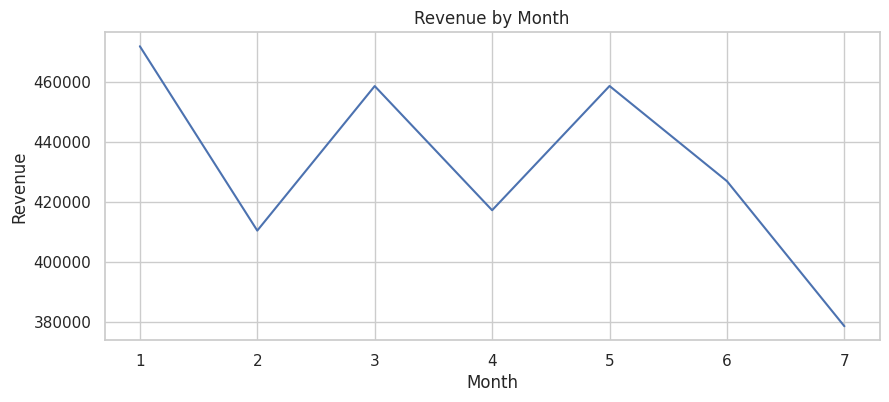

In [30]:
plt.figure(figsize=(10,4))
df.groupby('month')['revenue'].sum().plot(kind='line')
plt.title('Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [31]:
total_revenue = df['revenue'].sum()
print(f"📌 TOTAL REVENUE: ${total_revenue:,.2f}\n")

📌 TOTAL REVENUE: $3,022,405.89



📌 TOP PRODUCT CATEGORIES BY REVENUE:
product_category
Beauty         395431.97
Clothing       383617.73
Electronics    382325.96
Home           379620.88
Grocery        379413.13
Books          369414.41
Toys           368638.77
Sports         363943.04
Name: revenue, dtype: float64 



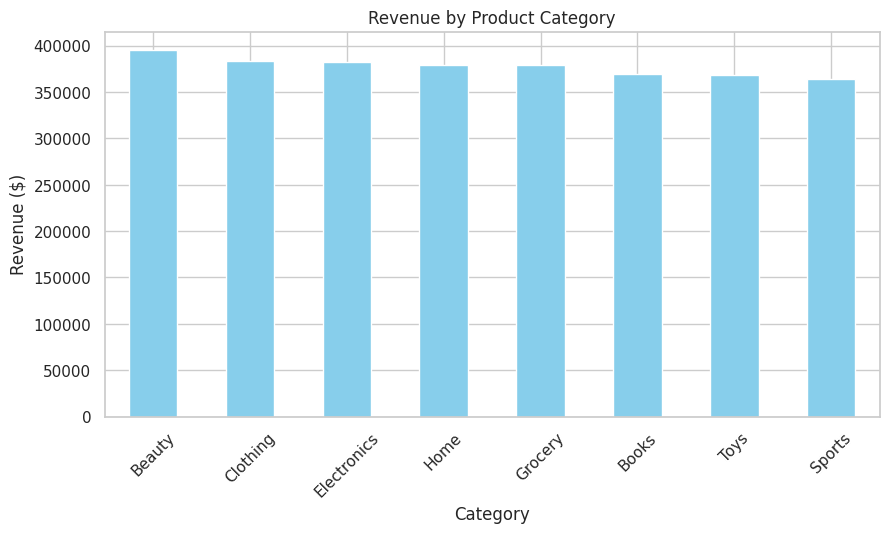

In [32]:
# TOP PRODUCT CATEGORIES BY REVENUE
# -----------------------------
category_revenue = df.groupby('product_category')['revenue'].sum().sort_values(ascending=False)

print("📌 TOP PRODUCT CATEGORIES BY REVENUE:")
print(category_revenue, "\n")

plt.figure(figsize=(10,5))
category_revenue.plot(kind='bar', color='skyblue')
plt.title("Revenue by Product Category")
plt.ylabel("Revenue ($)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

📌 TOP 10 CUSTOMERS BY TOTAL SPENDING:
customer_id
15940    3632.50
15474    3209.10
85492    2959.75
95657    2942.70
60791    2752.40
61994    2701.38
83724    2552.18
17780    2505.80
65718    2431.96
74891    2421.95
Name: revenue, dtype: float64 



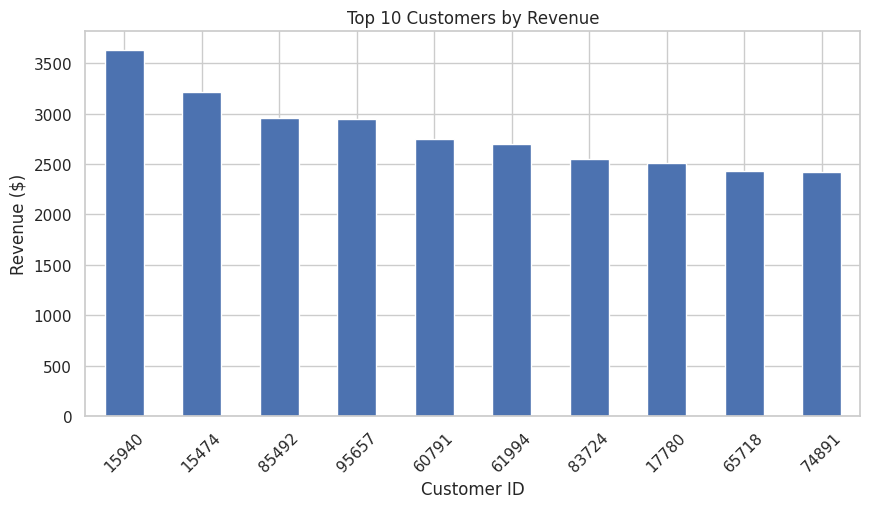

In [33]:
# TOP CUSTOMERS BY SPENDING
# -----------------------------
top_customers = df.groupby('customer_id')['revenue'].sum().sort_values(ascending=False).head(10)

print("📌 TOP 10 CUSTOMERS BY TOTAL SPENDING:")
print(top_customers, "\n")

plt.figure(figsize=(10,5))
top_customers.plot(kind='bar')
plt.title("Top 10 Customers by Revenue")
plt.ylabel("Revenue ($)")
plt.xlabel("Customer ID")
plt.xticks(rotation=45)
plt.show()

📌 MOST POPULAR CATEGORIES (BY ORDER COUNT):
product_category
Beauty         643
Electronics    629
Sports         627
Grocery        625
Home           624
Clothing       621
Toys           616
Books          615
Name: count, dtype: int64 



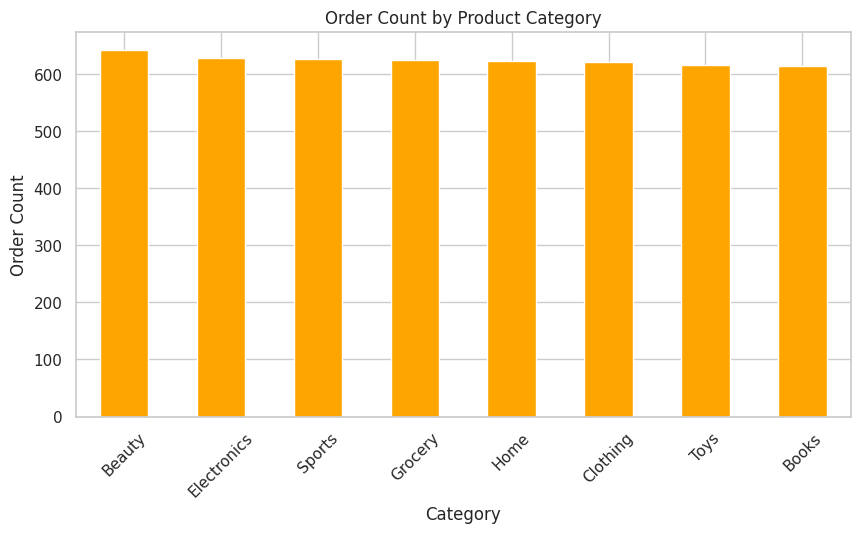

In [34]:
# TOP CATEGORIES BY NUMBER OF ORDERS
# -----------------------------
category_counts = df['product_category'].value_counts()

print("📌 MOST POPULAR CATEGORIES (BY ORDER COUNT):")
print(category_counts, "\n")

plt.figure(figsize=(10,5))
category_counts.plot(kind='bar', color='orange')
plt.title("Order Count by Product Category")
plt.xlabel("Category")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.show()

📌 CATEGORIES WITH MOST ITEMS SOLD (Quantity):
product_category
Beauty         1937
Grocery        1905
Electronics    1902
Home           1885
Clothing       1862
Books          1855
Sports         1843
Toys           1842
Name: quantity, dtype: int64 



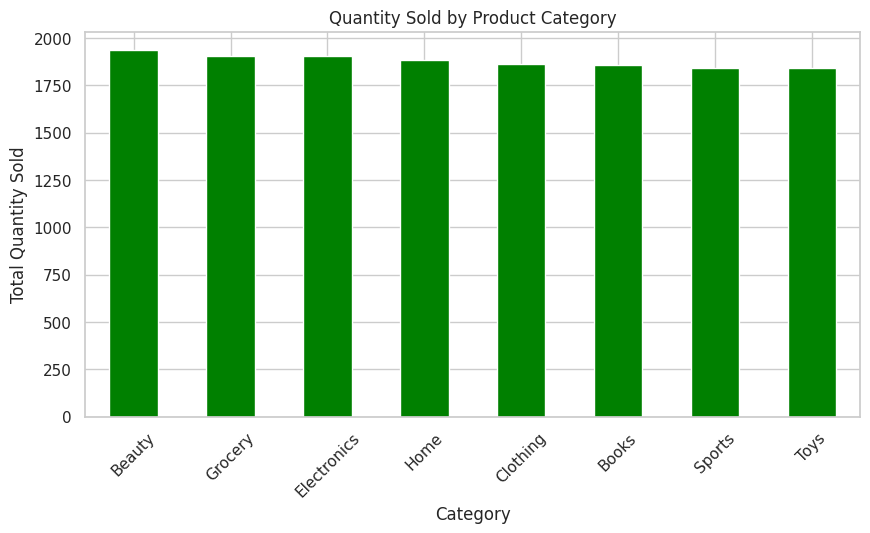

In [35]:
# TOP CATEGORIES BY QUANTITY SOLD
# -----------------------------
category_quantity = df.groupby('product_category')['quantity'].sum().sort_values(ascending=False)

print("📌 CATEGORIES WITH MOST ITEMS SOLD (Quantity):")
print(category_quantity, "\n")

plt.figure(figsize=(10,5))
category_quantity.plot(kind='bar', color='green')
plt.title("Quantity Sold by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

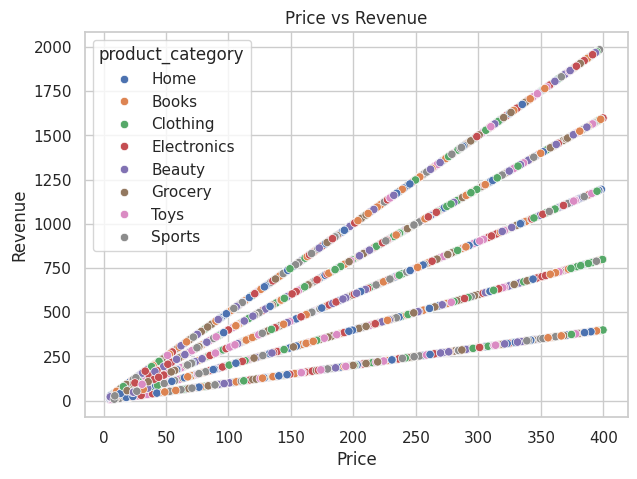

In [36]:
# PRICE vs REVENUE RELATIONSHIP
# -----------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='price', y='revenue', hue='product_category')
plt.title("Price vs Revenue")
plt.xlabel("Price")
plt.ylabel("Revenue")
plt.show()

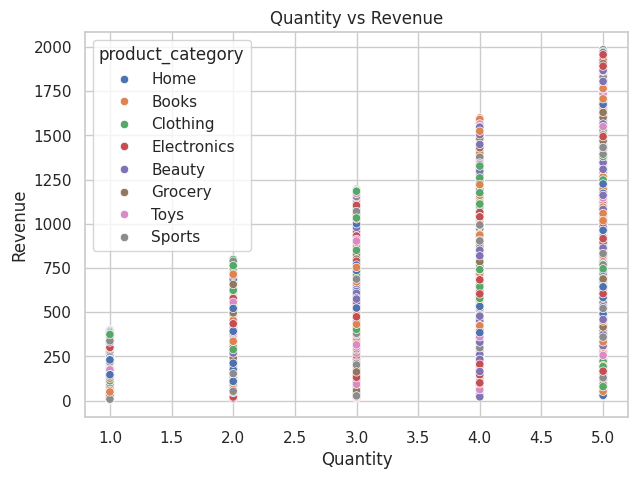

In [37]:
# QUANTITY vs REVENUE RELATIONSHIP
# -----------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='quantity', y='revenue', hue='product_category')
plt.title("Quantity vs Revenue")
plt.xlabel("Quantity")
plt.ylabel("Revenue")
plt.show()

📌 REVENUE CONTRIBUTION % BY CATEGORY:
product_category
Beauty         13.083351
Clothing       12.692462
Electronics    12.649723
Home           12.560222
Grocery        12.553348
Books          12.222528
Toys           12.196865
Sports         12.041501
Name: revenue, dtype: float64


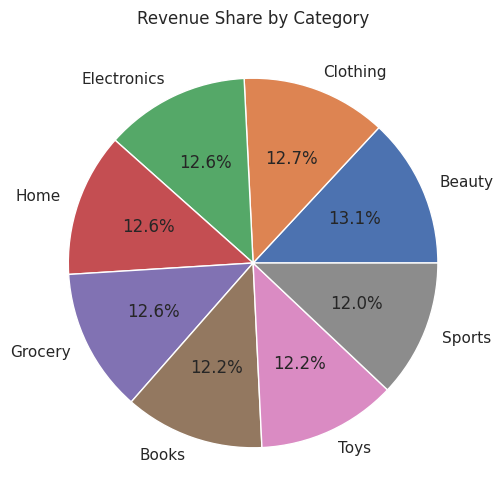

In [38]:
# CATEGORY CONTRIBUTION TO TOTAL REVENUE (%)
# -----------------------------
category_percentage = (category_revenue / total_revenue) * 100
print("📌 REVENUE CONTRIBUTION % BY CATEGORY:")
print(category_percentage)

plt.figure(figsize=(6,6))
category_percentage.plot(kind='pie', autopct='%1.1f%%')
plt.title("Revenue Share by Category")
plt.ylabel("")
plt.show()

⭐ What You Get From Step 4

This analysis shows:

✔ Which categories bring the most revenue
✔ Which customers spend the most
✔ Which categories sell the most units
✔ How price and quantity drive revenue
✔ Category percentage contribution (pie chart)
✔ Clear visual business insights

📌 CUSTOMER ORDER COUNT:
customer_id
77616    3
75145    3
85586    2
85579    2
52964    2
36563    2
74530    2
85492    2
13358    2
59644    2
Name: order_id, dtype: int64 



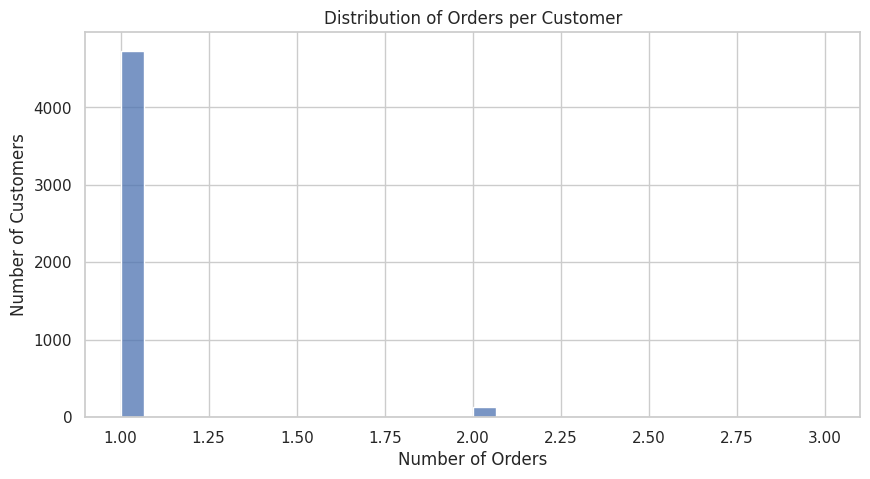

In [39]:
# CUSTOMER ORDER COUNT
# -----------------------------
customer_orders = df.groupby('customer_id')['order_id'].count().sort_values(ascending=False)
print("📌 CUSTOMER ORDER COUNT:")
print(customer_orders.head(10), "\n")

plt.figure(figsize=(10,5))
sns.histplot(customer_orders, bins=30, kde=False)
plt.title("Distribution of Orders per Customer")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.show()

📌 TOP 10 CUSTOMERS BY SPENDING:
customer_id
15940    3632.50
15474    3209.10
85492    2959.75
95657    2942.70
60791    2752.40
61994    2701.38
83724    2552.18
17780    2505.80
65718    2431.96
74891    2421.95
Name: revenue, dtype: float64 



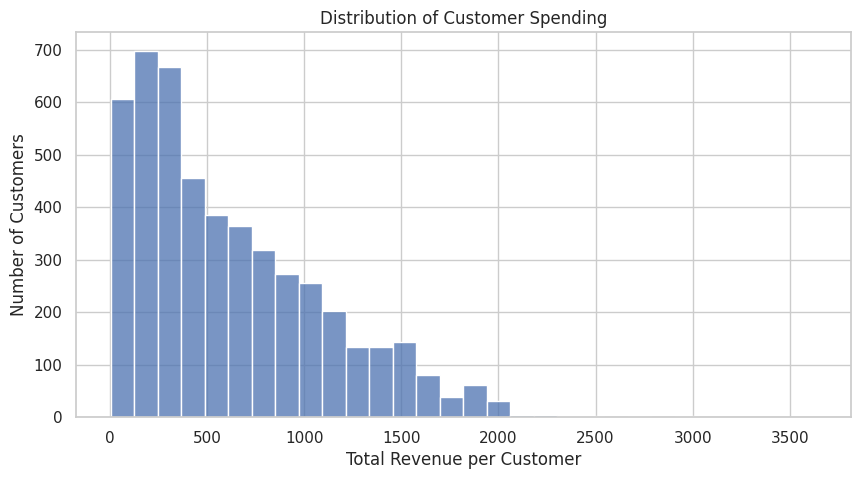

In [40]:
# CUSTOMER SPENDING
# -----------------------------
customer_spending = df.groupby('customer_id')['revenue'].sum().sort_values(ascending=False)
print("📌 TOP 10 CUSTOMERS BY SPENDING:")
print(customer_spending.head(10), "\n")

plt.figure(figsize=(10,5))
sns.histplot(customer_spending, bins=30, kde=False)
plt.title("Distribution of Customer Spending")
plt.xlabel("Total Revenue per Customer")
plt.ylabel("Number of Customers")
plt.show()

📌 Repeat Customers: 132
📌 One-Time Customers: 4734



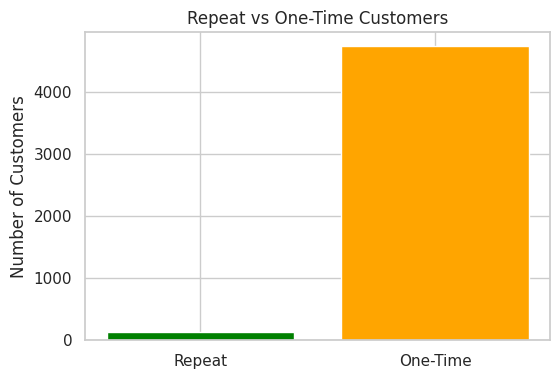

In [41]:
# REPEAT vs ONE-TIME BUYERS
# -----------------------------
repeat_customers = customer_orders[customer_orders > 1].count()
one_time_customers = customer_orders[customer_orders == 1].count()

print(f"📌 Repeat Customers: {repeat_customers}")
print(f"📌 One-Time Customers: {one_time_customers}\n")

plt.figure(figsize=(6,4))
plt.bar(['Repeat', 'One-Time'], [repeat_customers, one_time_customers], color=['green','orange'])
plt.title("Repeat vs One-Time Customers")
plt.ylabel("Number of Customers")
plt.show()

📌 AVERAGE RATING PER CUSTOMER (Top 10):
customer_id
23375    5.0
23476    5.0
24257    5.0
26154    5.0
26170    5.0
28147    5.0
36043    5.0
40953    5.0
90140    5.0
32017    5.0
Name: rating, dtype: float64 



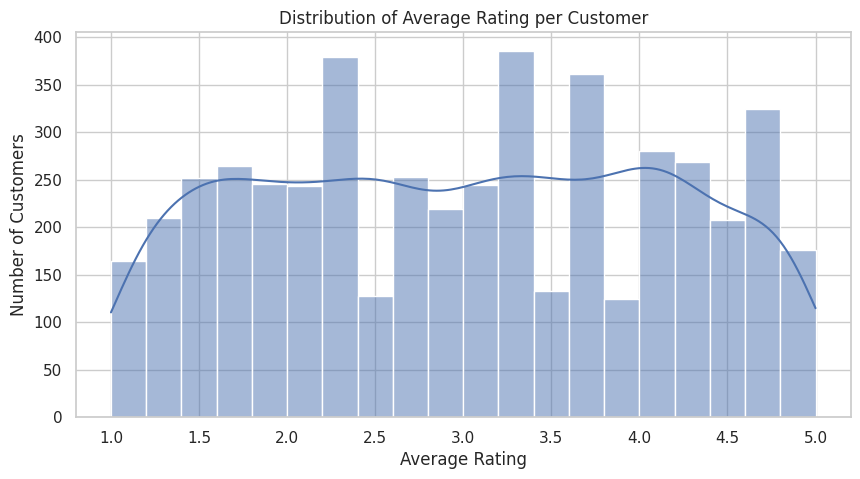

In [42]:
# AVERAGE RATING PER CUSTOMER
# -----------------------------
avg_rating_customer = df.groupby('customer_id')['rating'].mean()
print("📌 AVERAGE RATING PER CUSTOMER (Top 10):")
print(avg_rating_customer.sort_values(ascending=False).head(10), "\n")

plt.figure(figsize=(10,5))
sns.histplot(avg_rating_customer, bins=20, kde=True)
plt.title("Distribution of Average Rating per Customer")
plt.xlabel("Average Rating")
plt.ylabel("Number of Customers")
plt.show()

📌 CUSTOMER RETURN RATE (Top 10):
customer_id
17902    100.0
63908    100.0
72947    100.0
68094    100.0
80722    100.0
92616    100.0
18043    100.0
28501    100.0
73979    100.0
64054    100.0
Name: returned, dtype: float64 



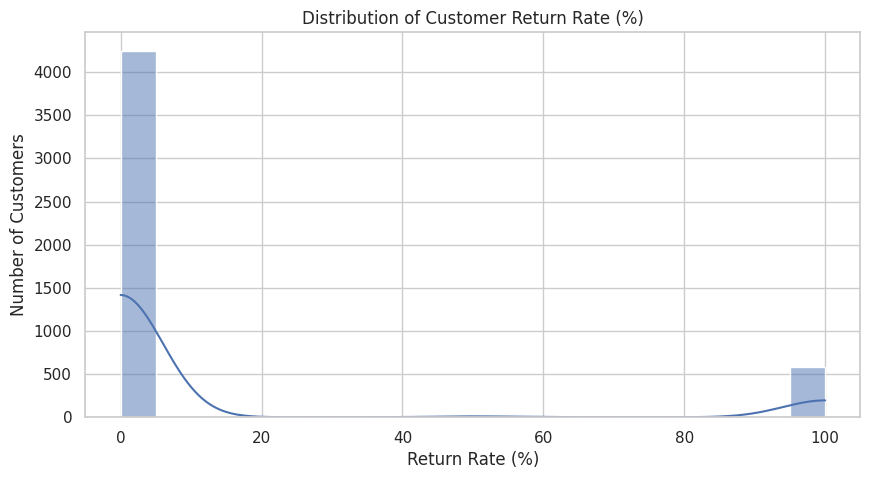

In [43]:
# CUSTOMER RETURN TENDENCY
# -----------------------------
return_rate_customer = df.groupby('customer_id')['returned'].mean() * 100
print("📌 CUSTOMER RETURN RATE (Top 10):")
print(return_rate_customer.sort_values(ascending=False).head(10), "\n")

plt.figure(figsize=(10,5))
sns.histplot(return_rate_customer, bins=20, kde=True)
plt.title("Distribution of Customer Return Rate (%)")
plt.xlabel("Return Rate (%)")
plt.ylabel("Number of Customers")
plt.show()

✅ Let’s move on to STEP 6 — Returns & Product Quality Analysis.

This step focuses on:

✔ Understanding which products or categories are returned most
✔ Identifying patterns in return behavior
✔ Exploring rating vs. return relationships
✔ Highlighting potential product quality issues

📌 RETURN RATE BY CATEGORY (%):
product_category
Beauty         12.286159
Books          12.845528
Clothing       12.721417
Electronics    12.082671
Grocery        12.480000
Home           12.179487
Sports         12.599681
Toys           12.012987
Name: returned, dtype: float64 



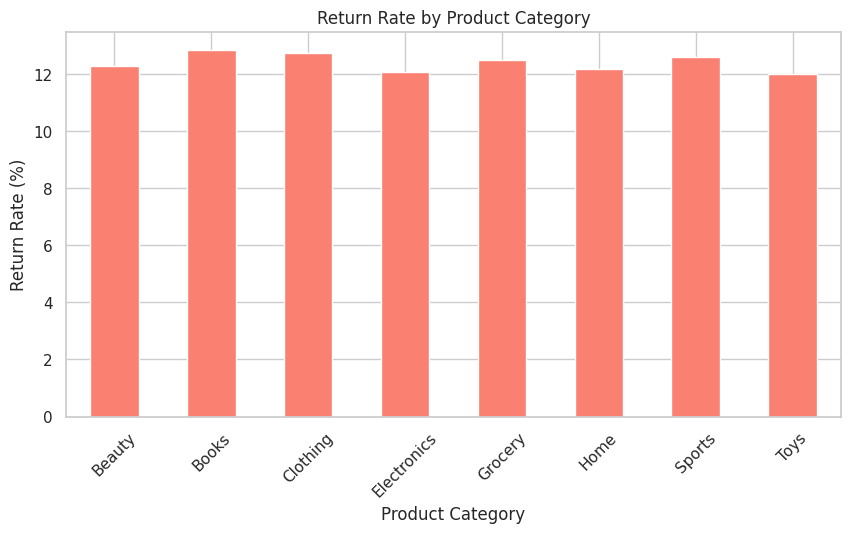

In [44]:
# RETURN RATE BY CATEGORY
# -----------------------------
category_return_rate = df.groupby('product_category')['returned'].mean() * 100
print("📌 RETURN RATE BY CATEGORY (%):")
print(category_return_rate, "\n")

plt.figure(figsize=(10,5))
category_return_rate.plot(kind='bar', color='salmon')
plt.title("Return Rate by Product Category")
plt.ylabel("Return Rate (%)")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.show()

📌 AVERAGE RATING BY CATEGORY:
product_category
Beauty         2.976205
Books          2.987642
Clothing       3.064251
Electronics    2.979173
Grocery        3.054080
Home           2.988141
Sports         3.012121
Toys           2.933929
Name: rating, dtype: float64 



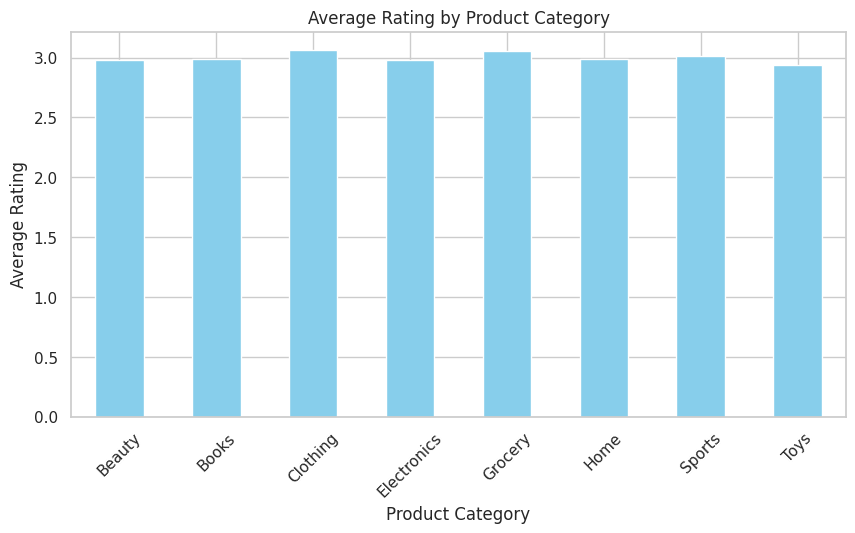

In [45]:
# AVERAGE RATING BY CATEGORY
# -----------------------------
category_avg_rating = df.groupby('product_category')['rating'].mean()
print("📌 AVERAGE RATING BY CATEGORY:")
print(category_avg_rating, "\n")

plt.figure(figsize=(10,5))
category_avg_rating.plot(kind='bar', color='skyblue')
plt.title("Average Rating by Product Category")
plt.ylabel("Average Rating")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.show()

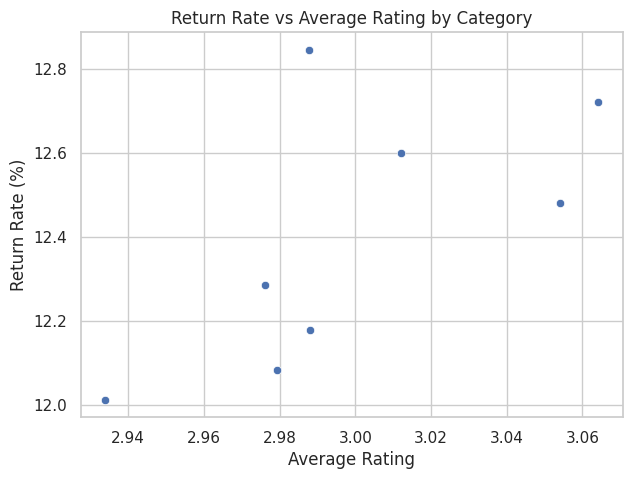

In [46]:
# RETURN RATE VS RATING
# -----------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(x=category_avg_rating, y=category_return_rate)
plt.title("Return Rate vs Average Rating by Category")
plt.xlabel("Average Rating")
plt.ylabel("Return Rate (%)")
plt.grid(True)
plt.show()

📌 TOP RETURNED PRODUCTS BY CATEGORY:
product_category
Beauty         79
Books          79
Clothing       79
Sports         79
Grocery        78
Electronics    76
Home           76
Toys           74
Name: order_id, dtype: int64 



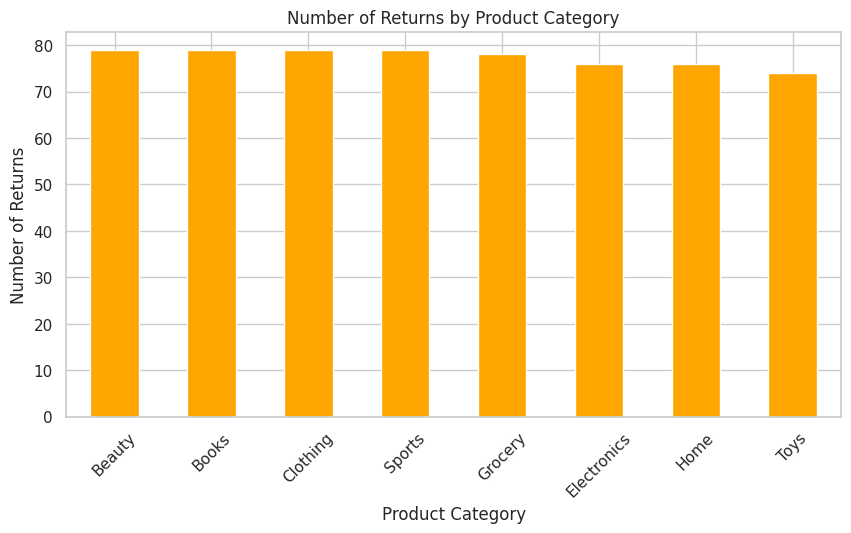

In [47]:
# TOP RETURNED PRODUCTS
# -----------------------------
top_returned_products = df[df['returned'] == 1].groupby('product_category')['order_id'].count().sort_values(ascending=False)
print("📌 TOP RETURNED PRODUCTS BY CATEGORY:")
print(top_returned_products, "\n")

plt.figure(figsize=(10,5))
top_returned_products.plot(kind='bar', color='orange')
plt.title("Number of Returns by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Number of Returns")
plt.xticks(rotation=45)
plt.show()

After running this, this shows:

Return rates by category

Average rating per category

Scatter plot of return rate vs rating

Categories with the most returned products

This is key for product quality improvement and inventory decisions.

✅ Now we move to STEP 7 — Time-Series Sales Trends.

This step helps you understand how sales evolve over time:

✔ Daily, weekly, and monthly revenue patterns
✔ Hour-of-day and weekday trends
✔ Seasonal patterns (if applicable)
✔ Visualizations for business forecasting

📌 Copy & run the full STEP 7 code below:

📌 DAILY REVENUE TREND (first 10 days):
purchase_time
2024-01-01    15576.64
2024-01-02    17573.88
2024-01-03    20670.34
2024-01-04    16052.74
2024-01-05    14035.13
2024-01-06     8775.13
2024-01-07    12288.51
2024-01-08    16297.51
2024-01-09    15465.40
2024-01-10    12809.30
Name: revenue, dtype: float64 



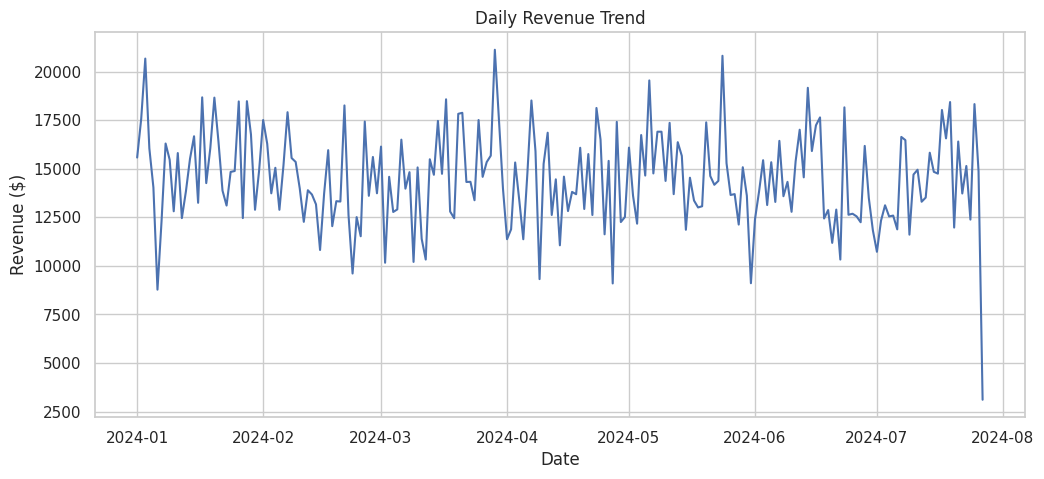

In [48]:
# DAILY SALES TREND
# -----------------------------
daily_revenue = df.groupby(df['purchase_time'].dt.date)['revenue'].sum()
print("📌 DAILY REVENUE TREND (first 10 days):")
print(daily_revenue.head(10), "\n")

plt.figure(figsize=(12,5))
daily_revenue.plot()
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.grid(True)
plt.show()

📌 WEEKLY REVENUE TREND:
week
1     104972.37
2     102182.52
3     113983.69
4     106100.72
5     107125.43
6     103132.40
7      93274.12
8      91161.93
9     101263.74
10     96247.72
Name: revenue, dtype: float64 



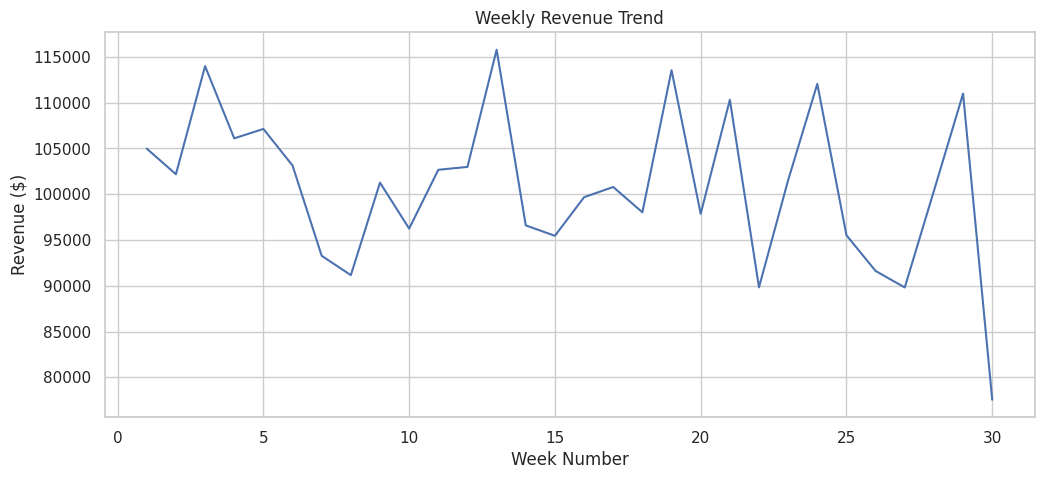

In [49]:
# WEEKLY SALES TREND
# -----------------------------
weekly_revenue = df.groupby(df['purchase_time'].dt.isocalendar().week)['revenue'].sum()
print("📌 WEEKLY REVENUE TREND:")
print(weekly_revenue.head(10), "\n")

plt.figure(figsize=(12,5))
weekly_revenue.plot()
plt.title("Weekly Revenue Trend")
plt.xlabel("Week Number")
plt.ylabel("Revenue ($)")
plt.grid(True)
plt.show()

📌 MONTHLY REVENUE TREND:
purchase_time
1    471790.72
2    410520.02
3    458554.38
4    417287.57
5    458585.31
6    426943.41
7    378724.48
Name: revenue, dtype: float64 



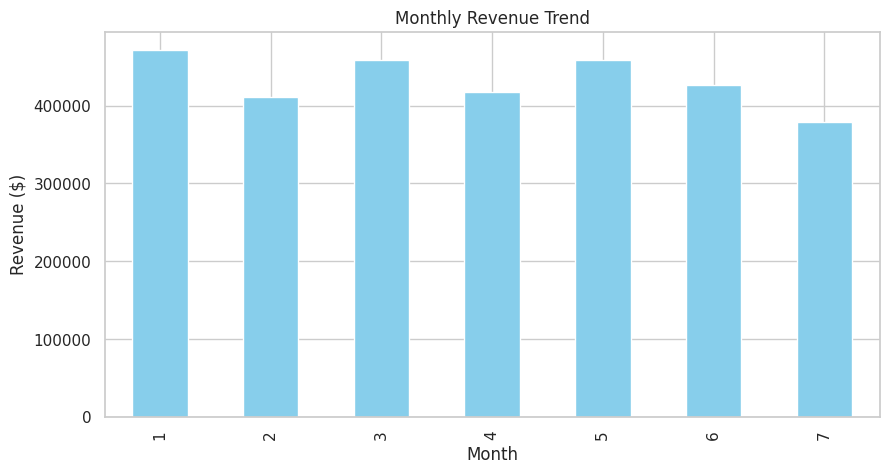

In [50]:
# MONTHLY SALES TREND
# -----------------------------
monthly_revenue = df.groupby(df['purchase_time'].dt.month)['revenue'].sum()
print("📌 MONTHLY REVENUE TREND:")
print(monthly_revenue, "\n")

plt.figure(figsize=(10,5))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.show()

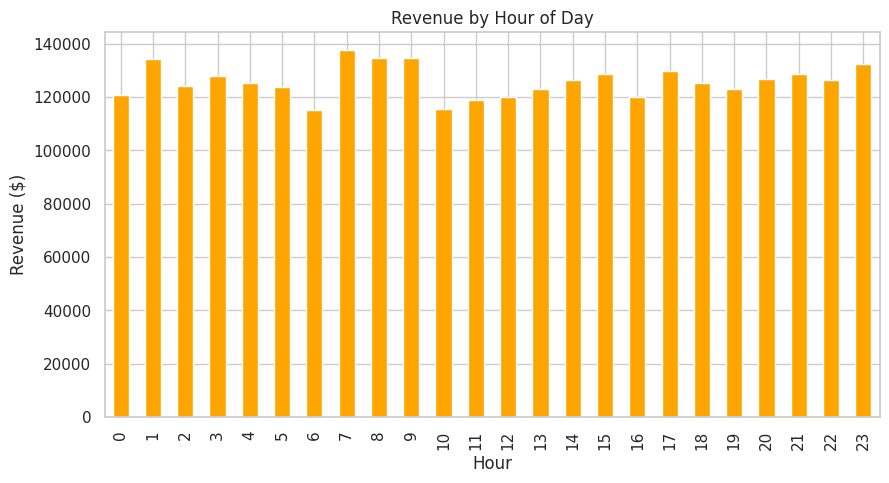

In [51]:
# -----------------------------
# HOURLY SALES TREND
# -----------------------------
hourly_revenue = df.groupby('hour')['revenue'].sum()
plt.figure(figsize=(10,5))
hourly_revenue.plot(kind='bar', color='orange')
plt.title("Revenue by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Revenue ($)")
plt.show()

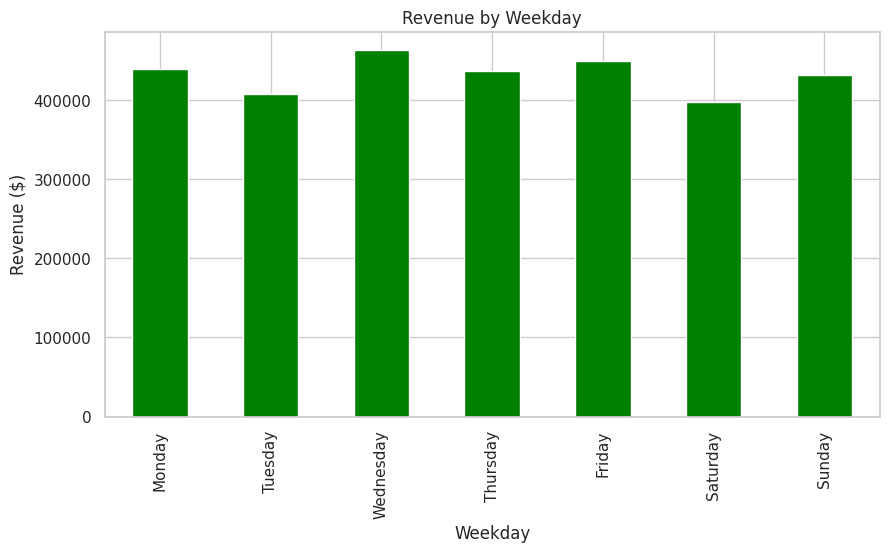

In [52]:
# -----------------------------
# WEEKDAY SALES TREND
# -----------------------------
weekday_revenue = df.groupby('weekday')['revenue'].sum()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,5))
weekday_revenue.reindex(weekday_order).plot(kind='bar', color='green')
plt.title("Revenue by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Revenue ($)")
plt.show()

This shows:

Daily, weekly, and monthly revenue trends

Hour-of-day and weekday revenue patterns

Visual insights for seasonality, peak sales hours, and growth trends

Machine Learning Models.

Here, you can leverage the cleaned dataset to predict key business metrics such as:

✔ Revenue per order
✔ Likelihood of a return
✔ Customer segmentation or behavior prediction

We’ll provide examples for two tasks:

Predicting Revenue (Regression)

Predicting Returns (Classification)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

In [54]:
# FEATURE SELECTION
# -----------------------------
# Encode categorical features
df_ml = df.copy()
df_ml = pd.get_dummies(df_ml, columns=['product_category', 'weekday'], drop_first=True)

# Features for ML
features = ['price', 'quantity', 'rating', 'hour', 'day', 'month'] + \
           [col for col in df_ml.columns if 'product_category_' in col or 'weekday_' in col]

In [56]:
 # -----------------------------
#TASK 1: Predict Revenue (Regression)
# -----------------------------
X = df_ml[features]
y_revenue = df_ml['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y_revenue, test_size=0.2, random_state=42)

reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"📌 Revenue Prediction (Regression) RMSE: {rmse:.2f}\n")

📌 Revenue Prediction (Regression) RMSE: 1.49



In [57]:
# -----------------------------
# TASK 2: Predict Returns (Classification)
# -----------------------------
y_return = df_ml['returned']

X_train, X_test, y_train, y_test = train_test_split(X, y_return, test_size=0.2, random_state=42)

clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train, y_train)
y_pred_class = clf_model.predict(X_test)

acc = accuracy_score(y_test, y_pred_class)
print(f"📌 Return Prediction (Classification) Accuracy: {acc*100:.2f}%\n")
print("📌 Classification Report:")
print(classification_report(y_test, y_pred_class))

📌 Return Prediction (Classification) Accuracy: 87.30%

📌 Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       873
           1       0.00      0.00      0.00       127

    accuracy                           0.87      1000
   macro avg       0.44      0.50      0.47      1000
weighted avg       0.76      0.87      0.81      1000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ What this step gives you:

Revenue prediction using Random Forest Regression

Return prediction using Random Forest Classification

Performance metrics (RMSE for regression, accuracy + classification report for classification)

Ready-to-deploy ML pipeline for Amazon-style retail analytics


 AMAZON RETAIL DATA ANALYSIS — DASHBOARD



/tmp/ipython-input-456946008.py:81: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


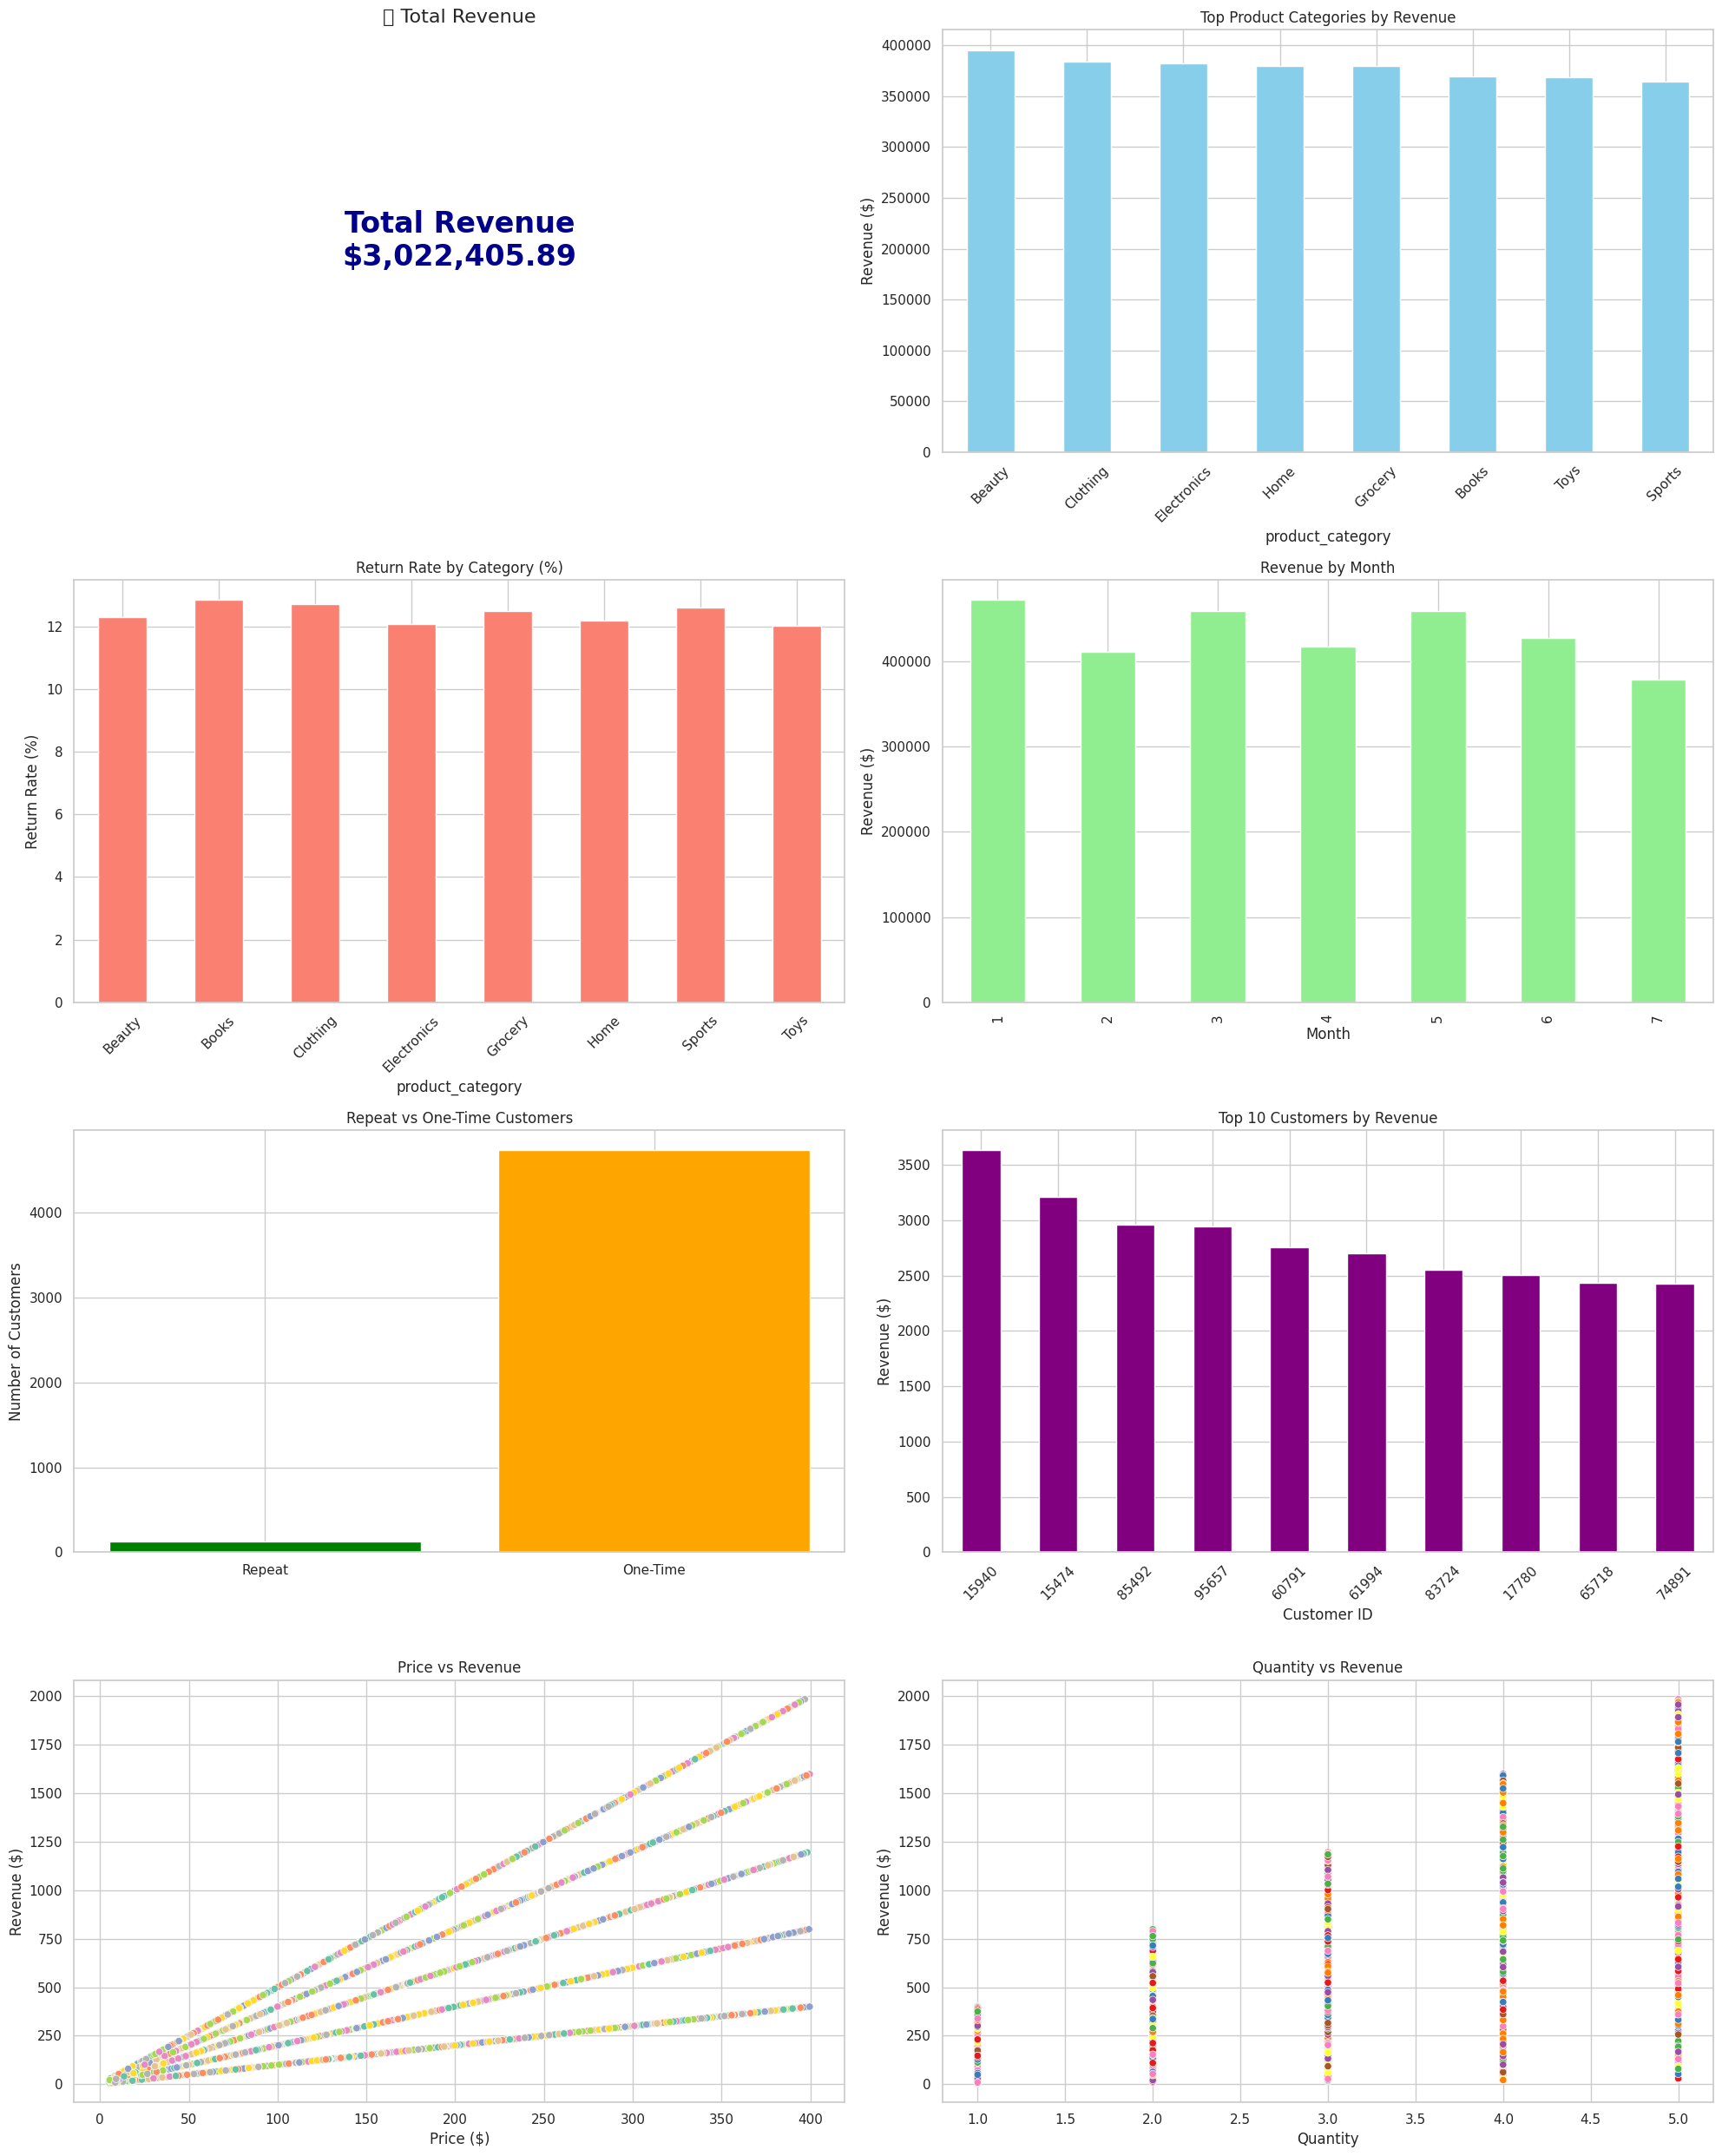


✅ Dashboard Ready — Key KPIs & Visual Insights Displayed


In [58]:
# =========================================================
# PROJECT DASHBOARD — VISUAL SUMMARY OF AMAZON RETAIL ANALYSIS
# =========================================================

import matplotlib.pyplot as plt
import seaborn as sns

print("\n====================================================")
print(" AMAZON RETAIL DATA ANALYSIS — DASHBOARD")
print("====================================================\n")

# -----------------------------
# Create figure with multiple subplots
# -----------------------------
plt.figure(figsize=(20,25))

# 1️⃣ Total Revenue
plt.subplot(4,2,1)
total_revenue = df['revenue'].sum()
plt.text(0.5, 0.5, f'Total Revenue\n${total_revenue:,.2f}',
         fontsize=24, ha='center', va='center', color='darkblue', weight='bold')
plt.axis('off')
plt.title('📌 Total Revenue', fontsize=16)

# 2️⃣ Top Product Categories by Revenue
plt.subplot(4,2,2)
category_revenue = df.groupby('product_category')['revenue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', color='skyblue')
plt.title('Top Product Categories by Revenue')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

# 3️⃣ Return Rate by Category
plt.subplot(4,2,3)
category_return_rate = df.groupby('product_category')['returned'].mean()*100
category_return_rate.plot(kind='bar', color='salmon')
plt.title('Return Rate by Category (%)')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45)

# 4️⃣ Revenue by Month
plt.subplot(4,2,4)
monthly_revenue = df.groupby('month')['revenue'].sum()
monthly_revenue.plot(kind='bar', color='lightgreen')
plt.title('Revenue by Month')
plt.ylabel('Revenue ($)')
plt.xlabel('Month')

# 5️⃣ Repeat vs One-Time Customers
plt.subplot(4,2,5)
customer_orders = df.groupby('customer_id')['order_id'].count()
repeat_customers = customer_orders[customer_orders>1].count()
one_time_customers = customer_orders[customer_orders==1].count()
plt.bar(['Repeat','One-Time'], [repeat_customers, one_time_customers], color=['green','orange'])
plt.title('Repeat vs One-Time Customers')
plt.ylabel('Number of Customers')

# 6️⃣ Top 10 Customers by Spending
plt.subplot(4,2,6)
top_customers = df.groupby('customer_id')['revenue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', color='purple')
plt.title('Top 10 Customers by Revenue')
plt.ylabel('Revenue ($)')
plt.xlabel('Customer ID')
plt.xticks(rotation=45)

# 7️⃣ Price vs Revenue Scatter
plt.subplot(4,2,7)
sns.scatterplot(data=df, x='price', y='revenue', hue='product_category', legend=False, palette='Set2')
plt.title('Price vs Revenue')
plt.xlabel('Price ($)')
plt.ylabel('Revenue ($)')

# 8️⃣ Quantity vs Revenue Scatter
plt.subplot(4,2,8)
sns.scatterplot(data=df, x='quantity', y='revenue', hue='product_category', legend=False, palette='Set1')
plt.title('Quantity vs Revenue')
plt.xlabel('Quantity')
plt.ylabel('Revenue ($)')

plt.tight_layout()
plt.show()

print("\n✅ Dashboard Ready — Key KPIs & Visual Insights Displayed")

✅ What this dashboard gives you:

Total revenue big KPI at a glance

Top product categories by revenue (bar chart)

Return rate by category (bar chart)

Monthly revenue trend (bar chart)

Repeat vs one-time customers (bar chart)

Top 10 customers by spending (bar chart)

Price vs revenue scatter plot

Quantity vs revenue scatter plot

Showing dashboards by:

Revenue Share by Category (Pie Chart)

Revenue by Weekday (Bar Chart)

/tmp/ipython-input-1897445947.py:86: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


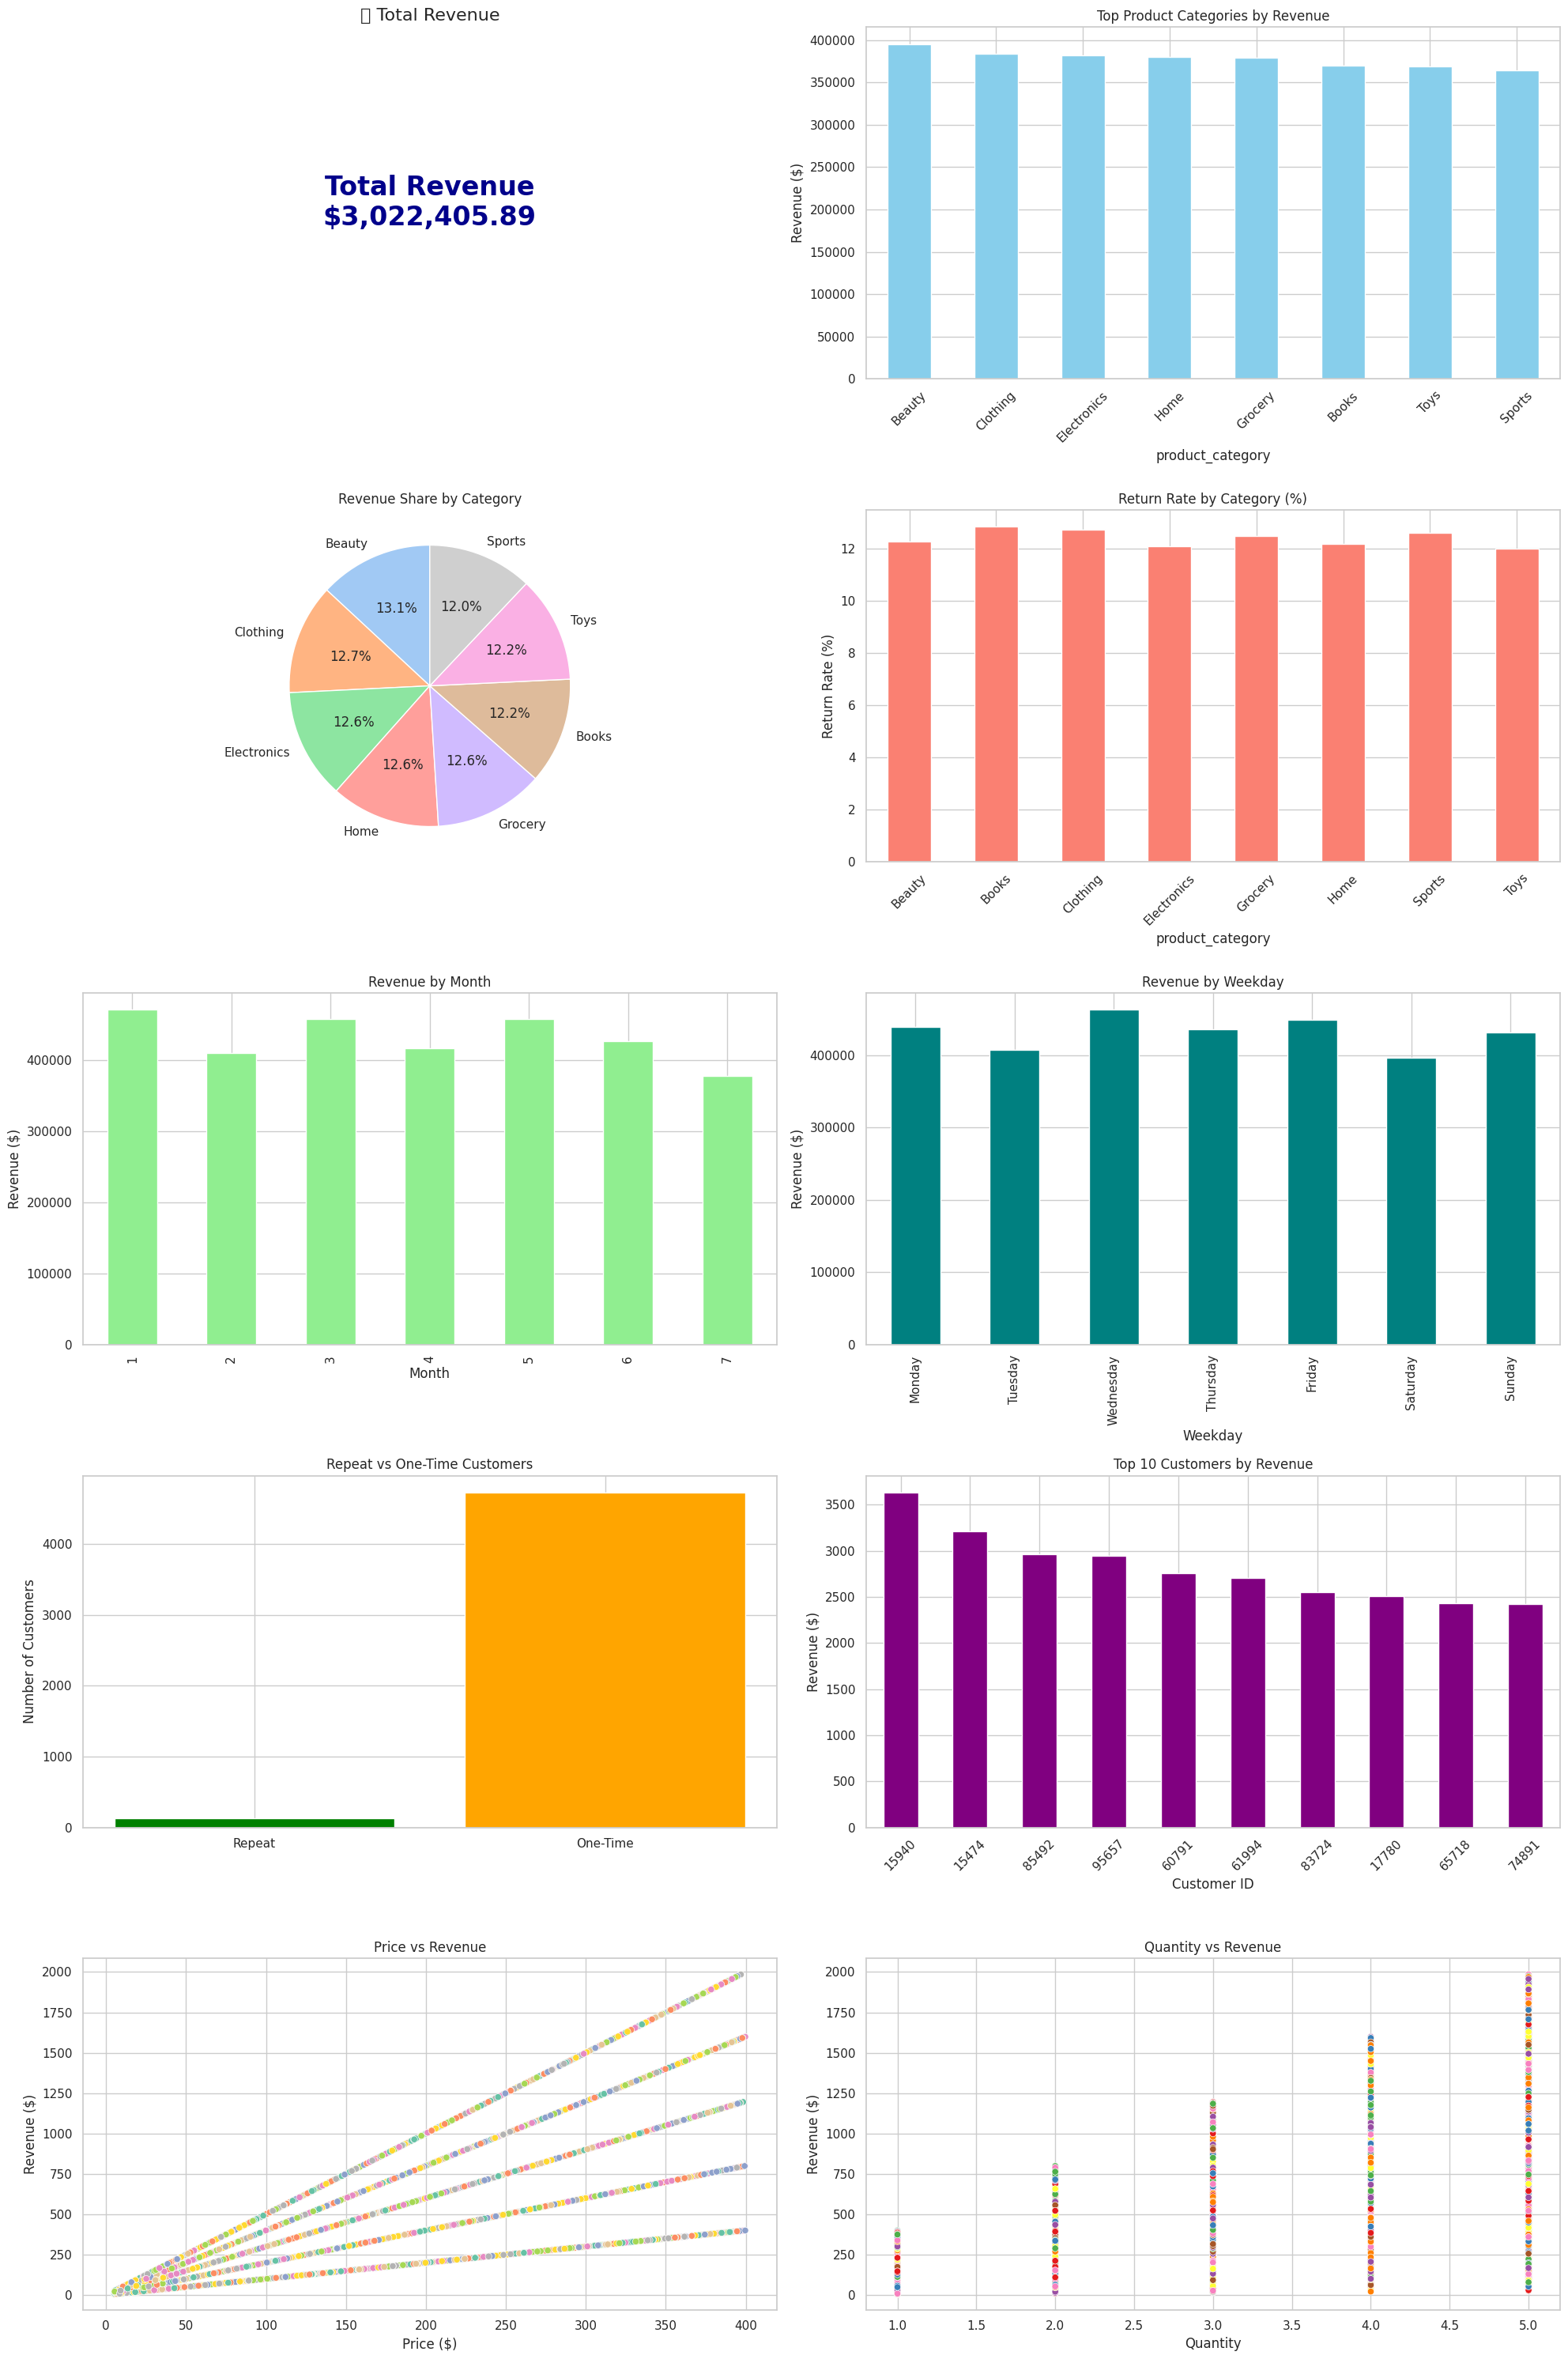

In [59]:
# -----------------------------
# Create figure with multiple subplots
# -----------------------------
plt.figure(figsize=(20,30))

# 1️⃣ Total Revenue
plt.subplot(5,2,1)
total_revenue = df['revenue'].sum()
plt.text(0.5, 0.5, f'Total Revenue\n${total_revenue:,.2f}',
         fontsize=24, ha='center', va='center', color='darkblue', weight='bold')
plt.axis('off')
plt.title('📌 Total Revenue', fontsize=16)

# 2️⃣ Top Product Categories by Revenue
plt.subplot(5,2,2)
category_revenue = df.groupby('product_category')['revenue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', color='skyblue')
plt.title('Top Product Categories by Revenue')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

# 3️⃣ Revenue Share by Category (Pie)
plt.subplot(5,2,3)
category_percentage = (category_revenue / total_revenue) * 100
category_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Revenue Share by Category')
plt.ylabel("")

# 4️⃣ Return Rate by Category
plt.subplot(5,2,4)
category_return_rate = df.groupby('product_category')['returned'].mean()*100
category_return_rate.plot(kind='bar', color='salmon')
plt.title('Return Rate by Category (%)')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45)

# 5️⃣ Revenue by Month
plt.subplot(5,2,5)
monthly_revenue = df.groupby('month')['revenue'].sum()
monthly_revenue.plot(kind='bar', color='lightgreen')
plt.title('Revenue by Month')
plt.ylabel('Revenue ($)')
plt.xlabel('Month')

# 6️⃣ Revenue by Weekday
plt.subplot(5,2,6)
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_revenue = df.groupby('weekday')['revenue'].sum()
weekday_revenue.reindex(weekday_order).plot(kind='bar', color='teal')
plt.title('Revenue by Weekday')
plt.ylabel('Revenue ($)')
plt.xlabel('Weekday')

# 7️⃣ Repeat vs One-Time Customers
plt.subplot(5,2,7)
customer_orders = df.groupby('customer_id')['order_id'].count()
repeat_customers = customer_orders[customer_orders>1].count()
one_time_customers = customer_orders[customer_orders==1].count()
plt.bar(['Repeat','One-Time'], [repeat_customers, one_time_customers], color=['green','orange'])
plt.title('Repeat vs One-Time Customers')
plt.ylabel('Number of Customers')

# 8️⃣ Top 10 Customers by Spending
plt.subplot(5,2,8)
top_customers = df.groupby('customer_id')['revenue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', color='purple')
plt.title('Top 10 Customers by Revenue')
plt.ylabel('Revenue ($)')
plt.xlabel('Customer ID')
plt.xticks(rotation=45)

# 9️⃣ Price vs Revenue Scatter
plt.subplot(5,2,9)
sns.scatterplot(data=df, x='price', y='revenue', hue='product_category', legend=False, palette='Set2')
plt.title('Price vs Revenue')
plt.xlabel('Price ($)')
plt.ylabel('Revenue ($)')

# 🔟 Quantity vs Revenue Scatter
plt.subplot(5,2,10)
sns.scatterplot(data=df, x='quantity', y='revenue', hue='product_category', legend=False, palette='Set1')
plt.title('Quantity vs Revenue')
plt.xlabel('Quantity')
plt.ylabel('Revenue ($)')

plt.tight_layout()
plt.show()

✅ This dashboard now provides:

Total Revenue

Top categories by revenue (bar chart)

Revenue share per category (pie chart)

Return rate per category (bar chart)

Revenue by month (bar chart)

Revenue by weekday (bar chart)

Repeat vs one-time customers

Top 10 customers by spending

Price vs revenue scatter

Quantity vs revenue scatter